In [1]:
import pandas as pd

In [2]:
d = pd.read_csv('./dataset_preprocessed.csv')

In [3]:
d

,gender,age,sleep_duration,sleep_quality,physical_activity_level,stress_level,bmi_category,heart_rate,sleep_disorder,systolic,diastolic
0,1,49,6.0,6,90,8,2,75,Sleep Apnea,140,95
1,0,52,6.5,6,45,7,2,72,Sleep Apnea,130,85
2,1,43,7.8,8,90,5,0,70,Normal,130,85
3,1,44,6.5,7,45,7,2,72,Insomnia,130,85
4,1,35,7.6,7,75,4,0,70,Normal,120,80
...,...,...,...,...,...,...,...,...,...,...,...
843,0,59,8.1,9,75,3,2,68,Sleep Apnea,140,95
844,0,59,8.0,9,75,3,2,68,Sleep Apnea,140,95
845,0,59,8.1,9,75,3,2,68,Sleep Apnea,140,95
846,0,59,8.1,9,75,3,2,68,Sleep Apnea,140,95


Creating X, y data

In [4]:
X = d.loc[:, d.columns != 'sleep_disorder']
y = d['sleep_disorder']

In [5]:
X.shape

(848, 10)

In [7]:
X.head(2)

,gender,age,sleep_duration,sleep_quality,physical_activity_level,stress_level,bmi_category,heart_rate,systolic,diastolic
0,1,49,6.0,6,90,8,2,75,140,95
1,0,52,6.5,6,45,7,2,72,130,85


In [8]:
y.head(2)

0    Sleep Apnea
1    Sleep Apnea
Name: sleep_disorder, dtype: object

# Model Selection

DTree: 0.870331 (0.020803)
RF: 0.893895 (0.022515)
KNN: 0.880912 (0.013018)
NB: 0.886787 (0.014705)
SVM: 0.753519 (0.052883)


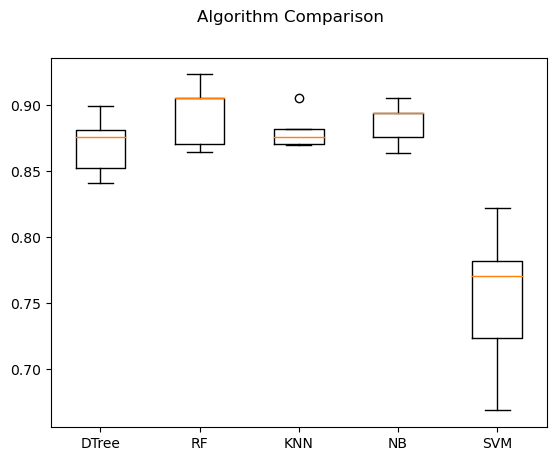

In [9]:
# Compare Algorithms
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
seed = 7
# prepare models
models = []
models.append(('DTree', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=5)
 cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

RandomForest Classifier Performs well even without hyperparameter tuning

### Hyperparameter Tuning - RandomForest Classifier

In [12]:
from sklearn.model_selection import RandomizedSearchCV

classifier = RandomForestClassifier()

In [13]:
param_grid = {
'bootstrap': [True],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
'max_features': ['sqrt', 'log2'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 8, 13],
'n_estimators': [50, 100, 200, 400, 600, 800, 1000]
}

In [14]:
tuner = RandomizedSearchCV(estimator=classifier,
                           param_distributions=param_grid,
                           n_jobs=-1,
                           cv=5,
                           n_iter=100,
                           verbose=2,
                           scoring='accuracy')

### Train Test Split


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
x_train.head(5)

,gender,age,sleep_duration,sleep_quality,physical_activity_level,stress_level,bmi_category,heart_rate,systolic,diastolic
581,1,37,7.8,8,70,4,1,68,120,80
115,1,38,7.1,8,60,5,0,68,130,85
606,1,38,7.3,8,60,5,0,68,130,85
459,0,51,7.5,8,75,4,1,70,120,80
474,1,27,6.1,6,42,6,2,77,126,83


Finding the Best Hyper Parameters

In [17]:
tuner.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_featu

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8, 13],
                                        'n_estimators': [50, 100, 200, 400, 600,
                                                         800, 1000]},
                   scoring='accuracy', verbose=2)

Obtaining the Best Parameters & Score

In [18]:
tuner.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 30,
 'bootstrap': True}

In [19]:
tuner.best_score_

0.9089303518017378

# Model Development with the Hyperparameteres

In [20]:
rf = RandomForestClassifier(n_estimators= 200,
                                  min_samples_split = 5,
                                  min_samples_leaf = 1,
                                  max_features = 'sqrt',
                                  max_depth = 70,
                                  bootstrap = True)

In [21]:
model_1 = rf.fit(x_train, y_train)

Metrics

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

y_pred = model_1.predict(x_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
prec = precision_score(y_true=y_test, y_pred=y_pred, average='micro')
recall = recall_score(y_true=y_test, y_pred=y_pred, average='micro')
cm_dis = ConfusionMatrixDisplay(cm)

In [23]:
from sklearn.metrics import classification_report

report = classification_report(y_true=y_test, y_pred=y_pred)


In [24]:
print(report)

              precision    recall  f1-score   support

    Insomnia       0.83      0.83      0.83        53
      Normal       0.92      0.92      0.92       143
 Sleep Apnea       0.88      0.88      0.88        59

    accuracy                           0.89       255
   macro avg       0.88      0.88      0.88       255
weighted avg       0.89      0.89      0.89       255



0.8941176470588236
0.8941176470588236
0.8941176470588236


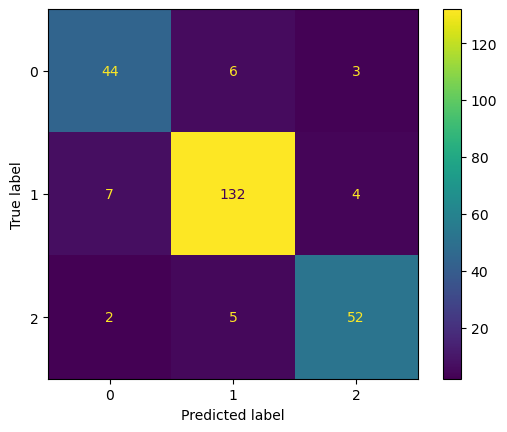

In [25]:
print(acc)
print(prec)
print(recall)
cm_dis.plot()

In [26]:
# pip install scikit-plot

Creating ROC curves

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

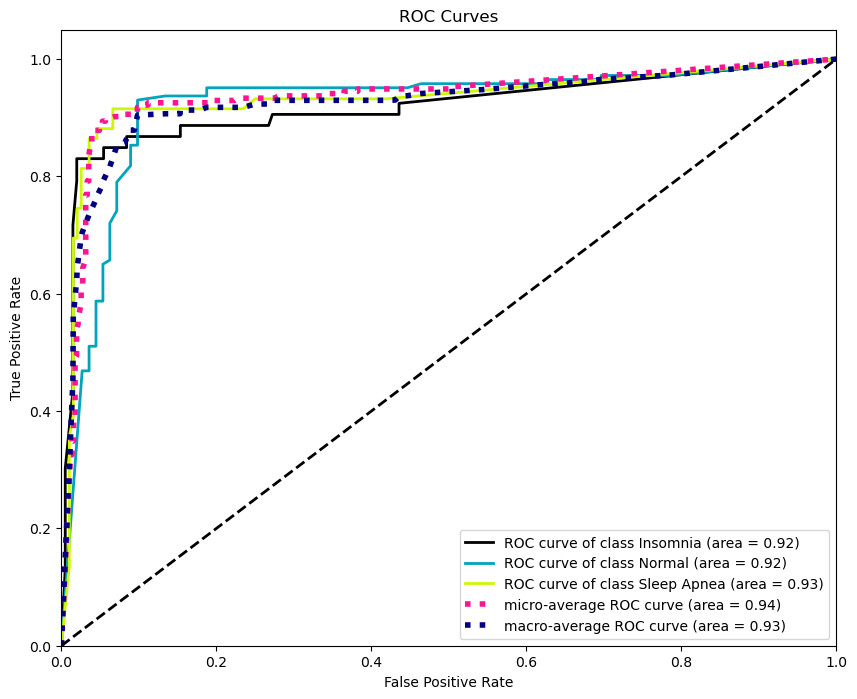

In [27]:
import scikitplot as skplt
y_probas=model_1.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

In [43]:
# from sklearn.metrics import roc_auc_score
# probs = y_probas[:, 1]
# print ('ROC AUC =', roc_auc_score(y_test, probs, multi_class='ovr'))

#### Evidently AI - Not Working as expected

In [44]:
# pip install evidently

# ML Flow

In [151]:
# pip install mlflow

  Obtaining dependency information for mlflow from https://files.pythonhosted.org/packages/64/4a/514286f441cade293efcdf77c9733d4ea3d50cd67e8b444beca1b9d85572/mlflow-2.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for databricks-cli<1,>=0.8.7 from https://files.pythonhosted.org/packages/ae/a3/d56f8382c40899301f327d1c881278b09c9b8bc301c2c111633a0346d06e/databricks_cli-0.18.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gitpython<4,>=2.1.0 from https://files.pythonhosted.org/packages/8d/c4/82b858fb6483dfb5e338123c154d19c043305b01726a67d89532b8f8f01b/GitPython-3.1.40-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<5,>=3.12.0 from https://files.pythonhosted.org/packages/c8/2c/03046cac73f46bfe98fc846ef629cf4f84c2f59258216aa2cc0d22bfca8f/protobuf-4.24.4-cp37-abi3-manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 801.4 kB/s eta 0:00:00 eta 0:00:01
  Obtaining dependency information fo